<a href="https://colab.research.google.com/github/ZhannaKG/my_hub_document/blob/main/_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Загрузите файл HR.csv в pandas dataframe**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df_hr = pd.read_csv('https://raw.githubusercontent.com/ZhannaKG/my_hub_document/main/HR.csv'
                         , sep = ',', encoding = 'latin-1',on_bad_lines='skip'
                         )
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).**

In [ ]:
val_list = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']
def stat_count(data_frame):
  res_df = pd.DataFrame()
  for el in val_list:
    min_v = data_frame[el].min()
    max_v = data_frame[el].max()
    range_v = max_v - min_v
    mean_v = data_frame[el].mean()
    mode_v = data_frame[el].mode()[0]
    median_v = data_frame[el].median()
    std_v = data_frame[el].std()
    var_v = data_frame[el].var()
    Q1 = data_frame[el].quantile(0.25)
    Q3 = data_frame[el].quantile(0.75)
    IQR = Q3 - Q1
    row = {'name_col': el,'min': min_v,'max': max_v, 
           'range': range_v,'mean': mean_v,'mode':mode_v,
           'median':median_v, 'std':std_v,'var':var_v,
           'Q1': Q1, 'Q3':Q3,'IQR': IQR}
    res_df = pd.concat([res_df, pd.DataFrame([row])])
  return res_df.reset_index(drop=True)
stat_count(df_hr)

,name_col,min,max,range,mean,mode,median,std,var,Q1,Q3,IQR
0,satisfaction_level,0.09,1.0,0.91,0.612834,0.10,0.64,0.248631,0.061817,0.44,0.82,0.38
1,last_evaluation,0.36,1.0,0.64,0.716102,0.55,0.72,0.171169,0.029299,0.56,0.87,0.31
2,number_project,2.00,7.0,5.00,3.803054,4.00,4.00,1.232592,1.519284,3.00,5.00,2.00
3,average_montly_hours,96.00,310.0,214.00,201.050337,135.00,200.00,49.943099,2494.313175,156.00,245.00,89.00
4,time_spend_company,2.00,10.0,8.00,3.498233,3.00,3.00,1.460136,2.131998,3.00,4.00,1.00
5,Work_accident,0.00,1.0,1.00,0.144610,0.00,0.00,0.351719,0.123706,0.00,0.00,0.00
6,left,0.00,1.0,1.00,0.238083,0.00,0.00,0.425924,0.181411,0.00,0.00,0.00
7,promotion_last_5years,0.00,1.0,1.00,0.021268,0.00,0.00,0.144281,0.020817,0.00,0.00,0.00


**3. Рассчитать и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.**


In [ ]:
# Рассчитаем корреляционную матрицу по методу Спирмена
K_S = df_hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr(method = 'spearman')
print(K_S)

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.162407        0.005786   
last_evaluation                 0.162407         1.000000        0.350399   
number_project                  0.005786         0.350399        1.000000   
average_montly_hours            0.062000         0.342061        0.397855   
time_spend_company             -0.139428         0.161154        0.251971   

                      average_montly_hours  time_spend_company  
satisfaction_level                0.062000           -0.139428  
last_evaluation                   0.342061            0.161154  
number_project                    0.397855            0.251971  
average_montly_hours              1.000000            0.168750  
time_spend_company                0.168750            1.000000  


<AxesSubplot:>

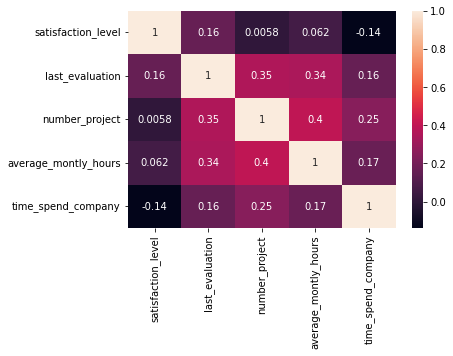

In [ ]:
#Визуализируем корреляционную матрицу:
sns.heatmap(df_hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr(method = 'spearman'), annot=True)

In [ ]:
df_hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr(method = 'spearman').style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


1. Самые скоррелированные переменные - average_montly_hours и number_project. Несмотря на то, что коэффициент корреляции ≈0,4 самый высокий среди всех, взаимосвязь у переменных слабая.
2. Самые наименее скоррелированные переменные - satisfaction_level и number_project

**4. Рассчитайте сколько сотрудников работает в каждом
департаменте.**

In [ ]:
#рассчитаем количество неуволившихся
department_num = (df_hr[df_hr['left'] == 0][['department','salary']].groupby(['department'])
                    .count()
                    .reset_index()
                  ).rename(columns={'salary': 'num_val'})
department_num                 

,department,num_val
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


**5. Показать распределение сотрудников по зарплатам.**

In [ ]:
department_s = (df_hr[df_hr['left'] == 0][['department','salary']].groupby(['salary'])
                    .count()
                    .reset_index()
                  ).rename(columns={'department': 'num_val'})
department_s

,salary,num_val
0,high,1155
1,low,5144
2,medium,5129


**6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [ ]:
ds_low = (df_hr[(df_hr['left'] == 0) &
               (df_hr['salary']=='low')][['department','left']].groupby(['department'])
                                        .count()
                                        .reset_index()
          ).rename(columns={'left': 'low'})
ds_medium = (df_hr[(df_hr['left'] == 0) &
               (df_hr['salary']=='medium')][['department','left']].groupby(['department'])
                                        .count()
                                        .reset_index()
             ).rename(columns={'left': 'medium'})
ds_high = (df_hr[(df_hr['left'] == 0) &
               (df_hr['salary']=='high')][['department','left']].groupby(['department'])
                                        .count()
                                        .reset_index()
             ).rename(columns={'left': 'high'})
ds_dep = df_hr['department'].drop_duplicates().reset_index()
ds_dep = ds_dep.drop('index', axis=1)
ds_department = (ds_dep
                  .merge(ds_low, on = 'department', how = 'left')
                  .merge(ds_medium, on = 'department', how = 'left')
                  .merge(ds_high, on = 'department', how = 'left')
                 )
ds_department

,department,low,medium,high
0,sales,1402,1469,255
1,accounting,259,235,69
2,hr,243,242,39
3,technical,994,853,176
4,support,757,784,133
5,management,121,194,224
6,IT,437,438,79
7,product_mng,346,296,62
8,marketing,276,308,71
9,RandD,309,310,47


**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

In [ ]:
#Проверим гипотезу, рассчитав среднее количество часов, которые сотрудники проводят на работе, в разрезе уровня дохода (используем данные неуволенных сотрудников):
department_s_m = (df_hr[df_hr['left'] == 0][['salary','average_montly_hours']].groupby(['salary'])
                    .mean('average_monthly_hours')
                    .reset_index()
                  ).rename(columns={'average_montly_hours': 'avg_hours'})
department_s_m

,salary,avg_hours
0,high,200.348052
1,low,198.617418
2,medium,199.214272


В результате расчета **гипотеза** о том, что работники с высоким окладом проводят на работе больше времени, **подтверждена**.

**8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**

*   Доля сотрудников с повышением за последние 5 лет - percentage_promo_%
*   Средняя степень удовлетворенности - avg_slevel
*   Среднее количество проектов - avg_projects



In [ ]:
df1 = (df_hr[['satisfaction_level','number_project','left','salary','promotion_last_5years']].groupby(['left'])
                    .agg({'satisfaction_level': 'mean','number_project': 'mean','promotion_last_5years': 'sum','salary': 'count'})
                    .reset_index()
                  ).rename(columns={'satisfaction_level': 'avg_slevel','number_project': 'avg_projects','promotion_last_5years': 'promo_num','salary': 'staff_num'})
df1['percentage_promo_%'] = df1['promo_num']/df1['staff_num']*100
df1[['left','avg_slevel','percentage_promo_%','avg_projects']]

,left,avg_slevel,percentage_promo_%,avg_projects
0,0,0.666810,2.625131,3.786664
1,1,0.440098,0.532064,3.855503


**9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).**
**Оценить качество модели на тестовой выборки**


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [ ]:
data_hr = df_hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [ ]:
#Разделим данные на 2 группы: тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_hr,df_hr['left'],test_size=0.30, random_state=42) 

In [ ]:
# загрузим модель
LDA = LinearDiscriminantAnalysis()
# обучим ее
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Прогноз на тестовой выборке
LDA.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Точность модели
accuracy_score(y_test,LDA.predict(X_test))

0.7557777777777778

Точность нашей модели составляет 75,58%